In [ ]:
#Nama : Ammar Ramadhan
#NIM  : 221011402334
#Kelas: 05 TPLM 006

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan untuk Permintaan
def permintaan_turun(x):
    if x <= 3000:
        return 1
    elif 3000 < x <= 4000:
        return (4000 - x) / 1000
    else:
        return 0

def permintaan_tetap(x):
    if 3000 <= x <= 4000:
        return (x - 3000) / 1000
    elif 4000 < x <= 5000:
        return (5000 - x) / 1000
    else:
        return 0

def permintaan_naik(x):
    if x <= 4000:
        return 0
    elif 4000 < x <= 5000:
        return (x - 4000) / 1000
    else:
        return 1


In [26]:
# Fungsi keanggotaan untuk Persediaan
def persediaan_sedikit(x):
    if x <= 200:
        return 1
    elif 200 < x <= 400:
        return (400 - x) / 200
    else:
        return 0

def persediaan_sedang(x):
    if 200 < x <= 400:
        return (x - 200) / 200
    elif 400 < x <= 600:
        return (600 - x) / 200
    else:
        return 0

def persediaan_banyak(x):
    if x <= 400:
        return 0
    elif 400 < x <= 600:
        return (x - 400) / 200
    else:
        return 1



In [27]:
# Fungsi keanggotaan untuk Produksi
def produksi_bertambah(x):
    if x <= 2000:
        return 0
    elif 2000 < x <= 5000:
        return (x - 2000) / 3000
    else:
        return 1

def produksi_berkurang(x):
    if x <= 2000:
        return 1
    elif 2000 < x <= 5000:
        return (5000 - x) / 3000
    else:
        return 0

In [28]:
# Inferensi berdasarkan aturan
def inferensi(permintaan, persediaan):
    # Aturan-aturan
    rules = [
        (min(permintaan_turun(permintaan), persediaan_sedikit(persediaan)), "bertambah"),
        (min(permintaan_turun(permintaan), persediaan_sedang(persediaan)), "berkurang"),
        (min(permintaan_turun(permintaan), persediaan_banyak(persediaan)), "berkurang"),
        (min(permintaan_tetap(permintaan), persediaan_sedikit(persediaan)), "bertambah"),
        (min(permintaan_tetap(permintaan), persediaan_sedang(persediaan)), "berkurang"),
        (min(permintaan_tetap(permintaan), persediaan_banyak(persediaan)), "berkurang"),
        (min(permintaan_naik(permintaan), persediaan_sedikit(persediaan)), "bertambah"),
        (min(permintaan_naik(permintaan), persediaan_sedang(persediaan)), "bertambah"),
        (min(permintaan_naik(permintaan), persediaan_banyak(persediaan)), "berkurang"),
    ]
    return rules



In [29]:
# Defuzzifikasi menggunakan metode Tsukamoto
def defuzzifikasi(rules):
    numerator = 0
    denominator = 0

    for (value, category) in rules:
        if category == "bertambah":
            z = 2000 + value * 3000  # Crisp value for bertambah
        elif category == "berkurang":
            z = 5000 - value * 3000  # Crisp value for berkurang
        else:
            continue

        numerator += value * z
        denominator += value

    return numerator / denominator if denominator != 0 else 0



In [30]:
# Contoh input
permintaan = 2500
persediaan = 500

# Proses inferensi dan defuzzifikasi
rules = inferensi(permintaan, persediaan)
output = defuzzifikasi(rules)



In [31]:
# Plot grafik fungsi keanggotaan
x_perm = np.linspace(0, 7000, 1000)
x_pers = np.linspace(0, 1000, 1000)
x_prod = np.linspace(0, 7000, 1000)

plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Permintaan')

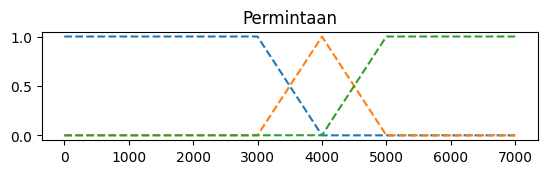

In [32]:
# Grafik Permintaan
plt.subplot(3, 1, 1)
plt.plot(x_perm, [permintaan_turun(x) for x in x_perm], label="Turun", linestyle='--')
plt.plot(x_perm, [permintaan_tetap(x) for x in x_perm], label="Tetap", linestyle='--')
plt.plot(x_perm, [permintaan_naik(x) for x in x_perm], label="Naik", linestyle='--')
plt.title("Permintaan")

Text(0.5, 1.0, 'Persediaan')

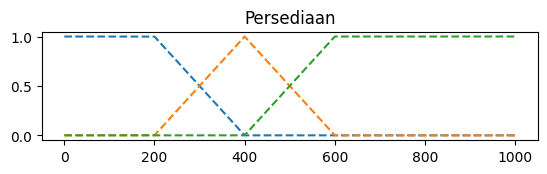

In [33]:
# Grafik Persediaan
plt.subplot(3, 1, 2)
plt.plot(x_pers, [persediaan_sedikit(x) for x in x_pers], label="Sedikit", linestyle='--')
plt.plot(x_pers, [persediaan_sedang(x) for x in x_pers], label="Sedang", linestyle='--')
plt.plot(x_pers, [persediaan_banyak(x) for x in x_pers], label="Banyak", linestyle='--')
plt.title("Persediaan")


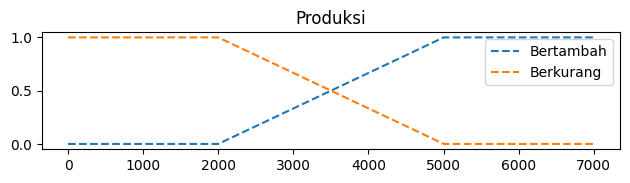

In [34]:
# Grafik Produksi
plt.subplot(3, 1, 3)
plt.plot(x_prod, [produksi_bertambah(x) for x in x_prod], label="Bertambah", linestyle='--')
plt.plot(x_prod, [produksi_berkurang(x) for x in x_prod], label="Berkurang", linestyle='--')
plt.title("Produksi")
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
output

3500.0